In [316]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

In [317]:
dataset = pd.read_csv("HappinessAlcoholConsumption.csv")
dataset = pd.DataFrame(dataset)

In [318]:
dataset.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100


In [319]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


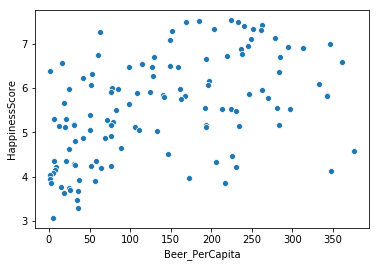

In [320]:
sns.scatterplot(x="Beer_PerCapita",y="HappinessScore",data=dataset)

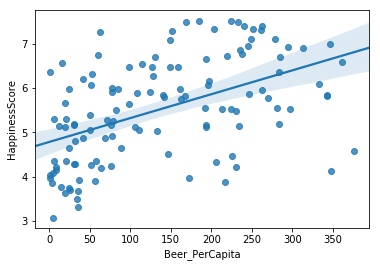

In [321]:
sns.regplot(x="Beer_PerCapita",y="HappinessScore",data=dataset)

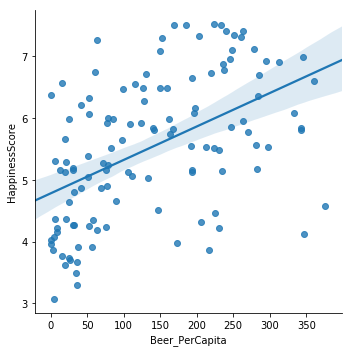

In [322]:
sns.lmplot(x="Beer_PerCapita",y="HappinessScore",data=dataset)

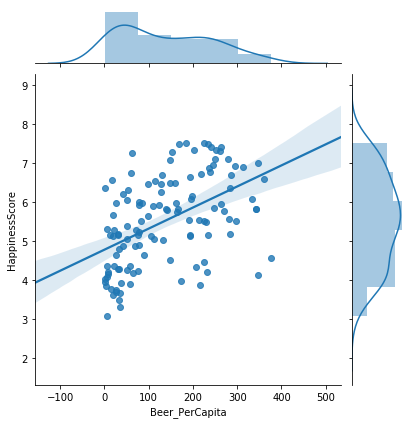

In [323]:
sns.jointplot(x="Beer_PerCapita",y="HappinessScore",data=dataset, kind="reg")

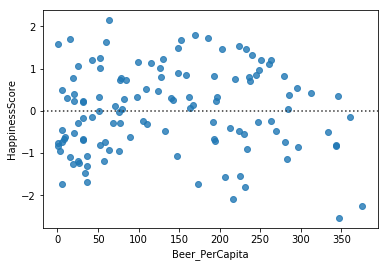

In [324]:
sns.residplot(x="Beer_PerCapita",y="HappinessScore",data=dataset) 

In [325]:
dataset.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


In [326]:
dataset["Beer_PerCapita"].corr(dataset["HappinessScore"])

0.49336720477895346

In [327]:
dataset["HappinessScore"].corr(dataset["Beer_PerCapita"])

0.4933672047789535

#### Split the data into training and test

In [328]:
X = dataset[["Beer_PerCapita"]]
y= dataset[["HappinessScore"]]
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.25,
                                                  random_state = 123)

In [329]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(91, 1) (91, 1)
(31, 1) (31, 1)


In [330]:
Train = pd.concat([X_train,y_train],axis=1)

In [331]:
Train.head()

,Beer_PerCapita,HappinessScore
65,230,5.488
23,285,6.701
9,152,7.291
91,147,4.513
79,194,5.123


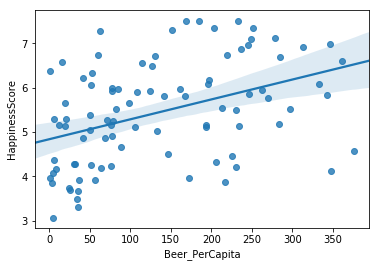

In [332]:
r=sns.regplot(x="Beer_PerCapita",y="HappinessScore",data=Train)

In [333]:
regression_model=linear_model.LinearRegression()
regression_model=regression_model.fit(X_train,y_train)

In [334]:
print("The R-squared is:", regression_model.score(X_train,y_train))

The R-squared is: 0.17086397872744372


In [335]:
print("Coefficients:", regression_model.coef_)

Coefficients: [[0.00448793]]


In [336]:
print("Intercept:",regression_model.intercept_)

Intercept: [4.83636699]


In [337]:
regression_model.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

##### Evaluate the accuracey of the model

In [338]:
y_pred = regression_model.predict(X_test)
y_pred=pd.DataFrame(y_pred)


In [339]:
y_test=y_test["HappinessScore"].reset_index()
y_obs_pred=pd.concat([y_test["HappinessScore"],y_pred],axis=1)
y_obs_pred.columns = ["y_test","y_pred"]

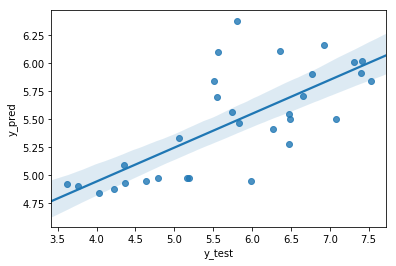

In [340]:
y_obs_pred["diff"]=y_obs_pred["y_test"]-y_obs_pred["y_pred"]
r=sns.regplot(x="y_test",y="y_pred",data=y_obs_pred)


Measuring the root mean squared error (RMSE)

In [341]:
diff=y_obs_pred["y_pred"]-y_obs_pred["y_test"]
diff_sq=diff**2
mean_diff_sq=diff_sq.mean()
RMSE=np.sqrt(mean_diff_sq)
RMSE

0.8934510872196844

In [343]:
regression_model = smf.ols('HappinessScore ~ Beer_PerCapita', data= Train).fit()

In [344]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     18.34
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           4.65e-05
Time:                        20:14:58   Log-Likelihood:                -132.40
No. Observations:                  91   AIC:                             268.8
Df Residuals:                      89   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8364      0.180     26.868      0.000       4.479       5.194
Beer_PerCapita     0.0045      0.001      4.283      0.000       0.002       0.007
==============================================================================
Omnibus:                        4.891   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                2.365
Skew:                          -0.026   Prob(JB):                        0.306
Kurtosis:                       2.212   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""